In [1]:
import pandas as pd


path = "./../../data/train/"

# Ml_item2attributes.json  directors.tsv  genres.tsv  titles.tsv  train_ratings.csv  writers.tsv  years.tsv

# Load data
titles = pd.read_csv(path + "titles.tsv", sep="\t")
years = pd.read_csv(path + "years.tsv", sep="\t")
genres = pd.read_csv(path + "genres.tsv", sep="\t")
directors = pd.read_csv(path + "directors.tsv", sep="\t")
writers = pd.read_csv(path + "writers.tsv", sep="\t")

# years에 년도 이미 있으니 없어도됨. 오로시뜸
titles['title'] = titles['title'].str.replace(r'\s*\(\d{4}\)$', '', regex=True)

ratings = pd.read_csv(path + "train_ratings.csv")

# Merge data
movie_df = pd.merge(titles, years, on="item", how="left")
movie_df = pd.merge(movie_df, genres, on="item", how="left")
movie_df = pd.merge(movie_df, directors, on="item", how="left")
movie_df = pd.merge(movie_df, writers, on="item", how="left")

# 왜 결측치가 있지?
movie_df['genre'] = movie_df['genre'].fillna('')
movie_df['writer'] = movie_df['writer'].fillna('')

# genre, writer 합치기
movie_df = movie_df.groupby(['item', 'title', 'year', 'director']).agg({
	'genre': lambda x: ', '.join(set(x)),
	'writer': lambda x: ', '.join(set(x))
}).reset_index()


movie_df['year'] = movie_df['year'].astype(int)


print(movie_df.head())


   item                        title  year   director  \
0     1                    Toy Story  1995  nm0005124   
1     2                      Jumanji  1995  nm0002653   
2     3             Grumpier Old Men  1995  nm0222043   
3     4            Waiting to Exhale  1995  nm0001845   
4     5  Father of the Bride Part II  1995  nm0796124   

                                             genre  \
0  Children, Adventure, Fantasy, Animation, Comedy   
1                     Fantasy, Children, Adventure   
2                                  Romance, Comedy   
3                           Romance, Comedy, Drama   
4                                           Comedy   

                                              writer  
0  nm0169505, nm0004056, nm0005124, nm0812513, nm...  
1                    nm0885575, nm0852430, nm0378144  
2                                          nm0425756  
3                                          nm0060103  
4         nm0796124, nm0329304, nm0583600, nm0352443  


In [2]:
years_set = set(movie_df['year'])

years = dict()

for year in years_set:
    years[year] = 0

for i, row in movie_df.iterrows():
    if row['year'] in years:
        years[row['year']] += 1


print(years)

sorted_year = dict(sorted(years.items(), key=lambda item: item[1], reverse=True))
print("Top 10 years")
for key in list(sorted_year.keys())[:20]:
    print("year :",key,"  |   movies :", sorted_year[key])

{1922: 2, 1923: 3, 1924: 4, 1925: 6, 1926: 2, 1927: 5, 1928: 6, 1929: 2, 1930: 3, 1931: 10, 1932: 9, 1933: 12, 1934: 7, 1935: 9, 1936: 13, 1937: 15, 1938: 13, 1939: 31, 1940: 34, 1941: 21, 1942: 23, 1943: 11, 1944: 18, 1945: 21, 1946: 19, 1947: 17, 1948: 24, 1949: 24, 1950: 24, 1951: 21, 1952: 20, 1953: 30, 1954: 23, 1955: 37, 1956: 24, 1957: 26, 1958: 25, 1959: 29, 1960: 30, 1961: 26, 1962: 41, 1963: 27, 1964: 32, 1965: 31, 1966: 29, 1967: 34, 1968: 29, 1969: 26, 1970: 36, 1971: 35, 1972: 40, 1973: 38, 1974: 36, 1975: 32, 1976: 34, 1977: 45, 1978: 40, 1979: 46, 1980: 48, 1981: 59, 1982: 56, 1983: 55, 1984: 67, 1985: 78, 1986: 74, 1987: 84, 1988: 85, 1989: 88, 1990: 92, 1991: 92, 1992: 109, 1993: 116, 1994: 127, 1995: 145, 1996: 144, 1997: 139, 1998: 161, 1999: 163, 2000: 166, 2001: 190, 2002: 202, 2003: 196, 2004: 194, 2005: 207, 2006: 237, 2007: 212, 2008: 194, 2009: 193, 2010: 169, 2011: 158, 2012: 117, 2013: 106, 2014: 66}
Top 10 years
year : 2006   |   movies : 237
year : 2007   |

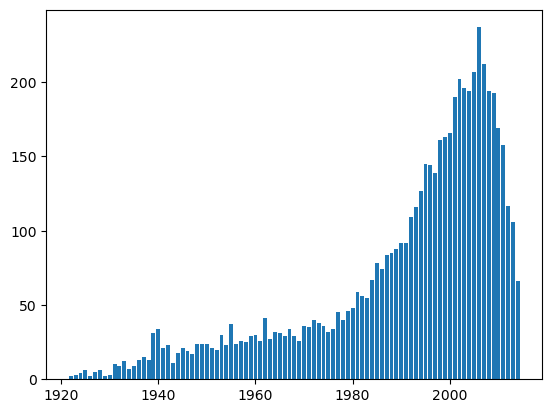

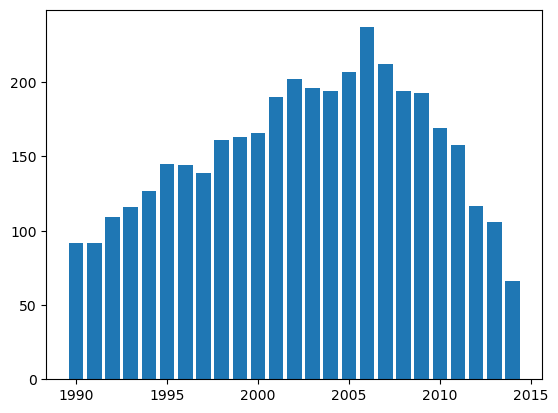

In [3]:
import matplotlib.pyplot as plt

plt.bar(years.keys(), years.values())
plt.show()

years_after_1990 = dict()
for key in years.keys():
    if key >= 1990:
        years_after_1990[key] = years[key]
plt.bar(years_after_1990.keys(), years_after_1990.values())
plt.show()

In [4]:
movie_df['year'].max()

2014

In [5]:
from difflib import SequenceMatcher


movie_series_title_list = ['Harry Potter', 'Star Trek', 'Star Wars', 'The Lord of the Rings', 'Avengers']

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

def series_similarity(movie_series_title):
    series_movie = movie_df[movie_df['title'].str.contains(movie_series_title)]
    print(series_movie['title'])

    # Calculate similarity scores
    similarity_scores = []
    titles = series_movie['title'].tolist()

    for i in range(len(titles)):
        for j in range(i + 1, len(titles)):
            score = similar(titles[i], titles[j])
            similarity_scores.append((titles[i], titles[j], score))

    # Print similarity scores
    for title1, title2, score in similarity_scores:
        print(f"Similarity between '{title1}' and '{title2}': {score:.2f}")

for title in movie_series_title_list:
    series_similarity(title)

2460    Harry Potter and the Sorcerer's Stone (a.k.a. ...
2779              Harry Potter and the Chamber of Secrets
3587             Harry Potter and the Prisoner of Azkaban
4295                  Harry Potter and the Goblet of Fire
4704            Harry Potter and the Order of the Phoenix
5118               Harry Potter and the Half-Blood Prince
5385         Harry Potter and the Deathly Hallows: Part 1
5500         Harry Potter and the Deathly Hallows: Part 2
Name: title, dtype: object
Similarity between 'Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone)' and 'Harry Potter and the Chamber of Secrets': 0.46
Similarity between 'Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone)' and 'Harry Potter and the Prisoner of Azkaban': 0.43
Similarity between 'Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone)' and 'Harry Potter and the Goblet of Fire': 0.41
Similarity between 'Harry Pot

In [ ]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!주의!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#  이거 한번 돌리는데 10분걸림. 파일로 저장해뒀으니 거기로 우회해서 사용하셈

# 대충 유사도 0.8 이상인 영화 추출하기
# 세상에 해리포터 1,2,4,5편을 봤는데 3편안본사람이 설마 있을까 싶어서
# 시리즈 담아둔 다음 다른 유저들이 3편 본 비율이 90% 넘으면 추천해주는거 있으면 조금 더 정교해지지 않을까 싶어서 일단 해봄

similarity_threshold = 0.8
similar_titles = []

titles = movie_df['title'].tolist()

for i in range(len(titles)):
    for j in range(i + 1, len(titles)):
        score = similar(titles[i], titles[j])
        if score > similarity_threshold:
            similar_titles.append((titles[i], titles[j], score))

print(similar_titles)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!주의!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

[('Toy Story', 'Toy Story 2', 0.9), ('Toy Story', 'Toy Story 2', 0.9), ('Toy Story', 'Toy Story 2', 0.9), ('Toy Story', 'Toy Story 3', 0.9), ('Grumpier Old Men', 'Grumpy Old Men', 0.8666666666666667), ('Father of the Bride Part II', 'Father of the Bride', 0.8260869565217391), ('Father of the Bride Part II', 'Father of the Bride', 0.8260869565217391), ('Sabrina', 'Sabrina', 1.0), ('Four Rooms', 'Four Rooms', 1.0), ('Four Rooms', 'Four Rooms', 1.0), ('Four Rooms', 'Four Rooms', 1.0), ('City of Lost Children, The (Cité des enfants perdus, La)', 'City of Lost Children, The (Cité des enfants perdus, La)', 1.0), ('Babe', 'Babel', 0.8888888888888888), ('Richard III', 'Richard III', 1.0), ('Dead Presidents', 'Dead Presidents', 1.0), ('Pocahontas', 'Pocahontas', 1.0), ('Friday', 'Frida', 0.9090909090909091), ('Kicking and Screaming', 'Kicking & Screaming', 0.9), ('Misérables, Les', 'Misérables, Les', 1.0), ('Misérables, Les', 'Misérables, Les', 1.0), ('Muppet Treasure Island', 'Treasure Island'

In [12]:
import os
import csv

path = './data/eda/'
if not os.path.exists(path):
    os.makedirs(path)

with open(path + 'similar_titles.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['title1', 'title2', 'similarity'])
    for row in similar_titles:
        writer.writerow(row)

In [7]:
print(len(similar_titles))

series_list = []

for title1, title2, score in similar_titles:
    if score < 1.0:
        match = SequenceMatcher(None, title1, title2).find_longest_match(0, len(title1), 0, len(title2))
        common_substring = title1[match.a: match.a + match.size]
        
        if len(common_substring) > 8:  # 수정하면되는 부분. 8인 이유는 토이스토리가 8이기때문
            series_list.append(common_substring)

print(set(series_list))
print(len(set(series_list)))

# 이거중 쓸만한 것들 한번 쭉 읽어보고 가면 될듯?

1313
{'ive by Night', 'Into the W', 'Waiting for ', 'Cheaper by the Dozen', ' Man, The', 'Transporter ', 'Man Who Knew Too ', ' (Trois couleurs: ', 'an of the Year', 'Treasure Island', 'Invisible', 'How to Train Your Dragon', 'Man with the Golden ', 's of Heaven', 'Nymphomaniac: Volume I', 'Father of the Bride', 'American M', 'Gods Must Be Crazy', 'Bad News Bears', 'Metropoli', 'Karate Kid, Part II', ' Furious (Fast and the Furious ', 'ride & Prejudice', 'Adventures of ', 'American Dream', 'Replacement', 'Friday the 13th Part ', "Look Who's Talking", ' Line, The', 'ator, The', 'Jungle Book', ' Yards, The', 'Dark Knight', 'Deep Blue', ' Musketeers, The', ' One, The', ' Prejudice', 'Superman II', 'Godfather: Part II', 'High School Musical', ' Under the Influence, A', 'Little Princess, ', 'Paranormal Activity ', 'Resident Evil: ', 'Lethal Weapon', 'ighter, The', 'Perfect S', ' Dalmatians', "e O'Clock High", 'Flight of the Phoenix', 'Expendables', 'Castle, The', 'Major League', 'Jeepers Cr

In [13]:
movie_audience = {}
users = {}

for i, row in ratings.iterrows():
    user = row['user']
    movie = row['item']
    if user not in users:
        users[user] = []
    if movie not in movie_audience:
        movie_audience[movie] = 0
    movie_audience[movie] += 1
    users[user].append(movie)

directors = {}
for i, row in movie_df.iterrows():
    director = row['director']
    if director not in directors:
        directors[director] = []
    directors[director].append(row['item'])
    


max user count :  2912
min user count :  16
mean user count :  164.36450892857144


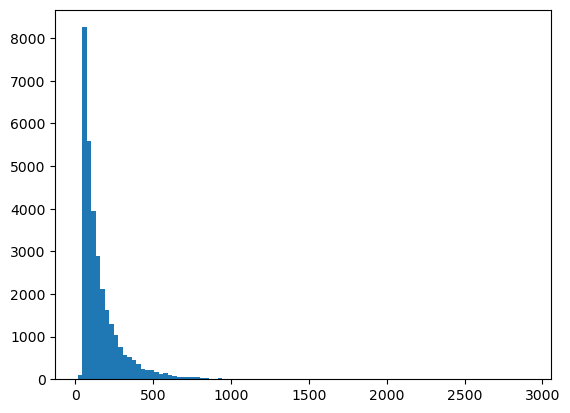

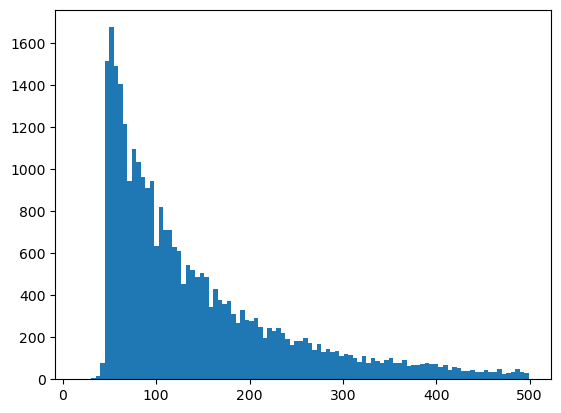

In [ ]:
user_count = {}

for user, movies in users.items():
    user_count[user] = len(movies)
    
print("max user count : ", max(user_count.values()))
print("min user count : ", min(user_count.values()))
print("mean user count : ", sum(user_count.values()) / len(user_count))

plt.hist(user_count.values(), bins=100)
plt.show()

user_count_amputated = {k: v for k, v in user_count.items() if v < 500}
plt.hist(user_count_amputated.values(), bins=100)
plt.show()


In [34]:
print(len(user_count))

31360


max movie audience :  19699
min movie audience :  27
mean movie audience :  757.2309387395328
top 10 movies
movie : Matrix, The   |   audience : 19699
movie : Fight Club   |   audience : 18437
movie : Pulp Fiction   |   audience : 18202
movie : Shawshank Redemption, The   |   audience : 18168
movie : Forrest Gump   |   audience : 17339
movie : Lord of the Rings: The Fellowship of the Ring, The   |   audience : 17237
movie : Lord of the Rings: The Return of the King, The   |   audience : 16656
movie : Lord of the Rings: The Two Towers, The   |   audience : 16387
movie : Silence of the Lambs, The   |   audience : 15847
movie : American Beauty   |   audience : 15213


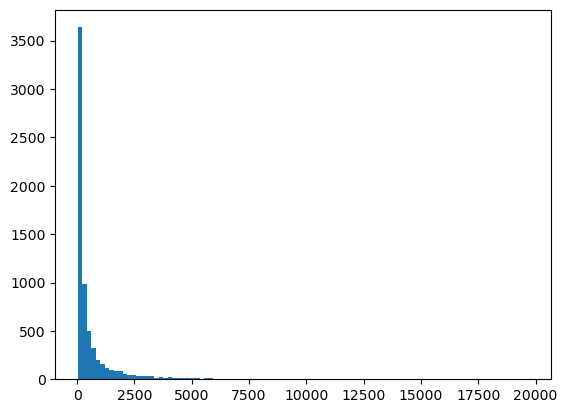

masterpiece movies
movie : Matrix, The   |   audience : 19699
movie : Fight Club   |   audience : 18437
movie : Pulp Fiction   |   audience : 18202
movie : Shawshank Redemption, The   |   audience : 18168
movie : Forrest Gump   |   audience : 17339
movie : Lord of the Rings: The Fellowship of the Ring, The   |   audience : 17237
movie : Lord of the Rings: The Return of the King, The   |   audience : 16656
movie : Lord of the Rings: The Two Towers, The   |   audience : 16387
movie : Silence of the Lambs, The   |   audience : 15847
movie : American Beauty   |   audience : 15213
movie : Memento   |   audience : 14726
movie : Star Wars: Episode IV - A New Hope   |   audience : 14613
movie : Star Wars: Episode V - The Empire Strikes Back   |   audience : 14401
movie : Sixth Sense, The   |   audience : 14291
movie : Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark)   |   audience : 14224
movie : Seven (a.k.a. Se7en)   |   audience : 13857
movie : Usual Suspects, The   |

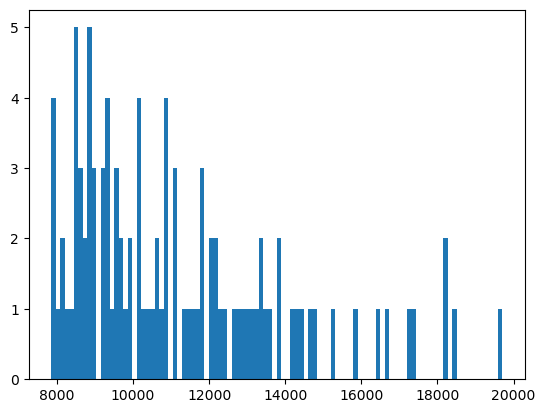

In [37]:
print("max movie audience : ", max(movie_audience.values()))
print("min movie audience : ", min(movie_audience.values()))
print("mean movie audience : ", sum(movie_audience.values()) / len(movie_audience))

movie_audience = {k: v for k, v in sorted(movie_audience.items(), key=lambda item: item[1], reverse=True)}
print("top 10 movies")
for key in list(movie_audience.keys())[:10]:
    title = movie_df[movie_df['item'] == key]
    print("movie :", title["title"].values[0],"  |   audience :", movie_audience[key])
plt.hist(movie_audience.values(), bins=100)
plt.show()

movie_audience_masterpiece = {k: v for k, v in movie_audience.items() if v > len(user_count)/4}
print("masterpiece movies")
for key in movie_audience_masterpiece.keys():
    title = movie_df[movie_df['item'] == key]
    print("movie :", title["title"].values[0],"  |   audience :", movie_audience_masterpiece[key])

print("The number of MAM :", len(movie_audience_masterpiece))
plt.hist(movie_audience_masterpiece.values(), bins=100)
plt.show()

max director count :  44
min director count :  2
mean director count :  4.405526512322629


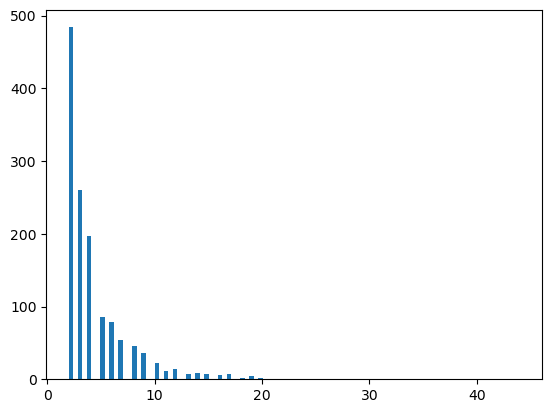

In [ ]:
director_count = {}
director_audience = {}

for director, movies in directors.items():
    director_count[director] = len(movies)
    director_audience[director] = sum([movie_audience[movie] for movie in movies])

print("max director count : ", max(director_count.values()))
print("min director count : ", min(director_count.values()))
print("mean director count : ", sum(director_count.values()) / len(director_count))

plt.hist(director_count.values(), bins=100)
plt.show()

